# SIFT intersection

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import os

%matplotlib inline

In [2]:
def load_img(path):
    return skimage.io.imread(path)

def gray(img):
    return skimage.color.rgb2gray(img)

def plot_img(img, figsize=None, cmap="gray", title=None, save=False, savename="image.png"):
    if isinstance(img, list):
        if figsize == None:
            figsize = (15, 15)
        fig = plt.figure(figsize=figsize)
        if title:
            fig.suptitle(title)
        n = int(np.sqrt(len(img)))
        if np.sqrt(len(img)) - n > 0:
            for idx, i in enumerate(img):
                fig.add_subplot(n+1, n+1, idx+1)
                plt.title(f"{idx}")
                plt.imshow(i, cmap=cmap)
                plt.axis("off")
        else:
            for idx, i in enumerate(img):
                fig.add_subplot(n, n, idx+1)
                plt.title(f"{idx}")
                plt.imshow(i, cmap=cmap)
                plt.axis("off")
    else:
        if title:
            plt.title(title)
        if figsize == None:
            figsize = (6, 3)
        plt.figure(figsize=figsize)
        plt.imshow(img, cmap=cmap)
        plt.axis("off")

        if save:
            plt.savefig(savename)

    plt.tight_layout()
    plt.show()

In [3]:
clean_path = "dataset/istock/clean"
marked_path = "dataset/istock/watermarked"

clean = [load_img(clean_path + "/" + i) for i in os.listdir(clean_path) if os.path.isfile(clean_path + "/" + i)]
marked = [load_img(marked_path + "/" + i) for i in os.listdir(marked_path) if os.path.isfile(marked_path + "/" + i)]

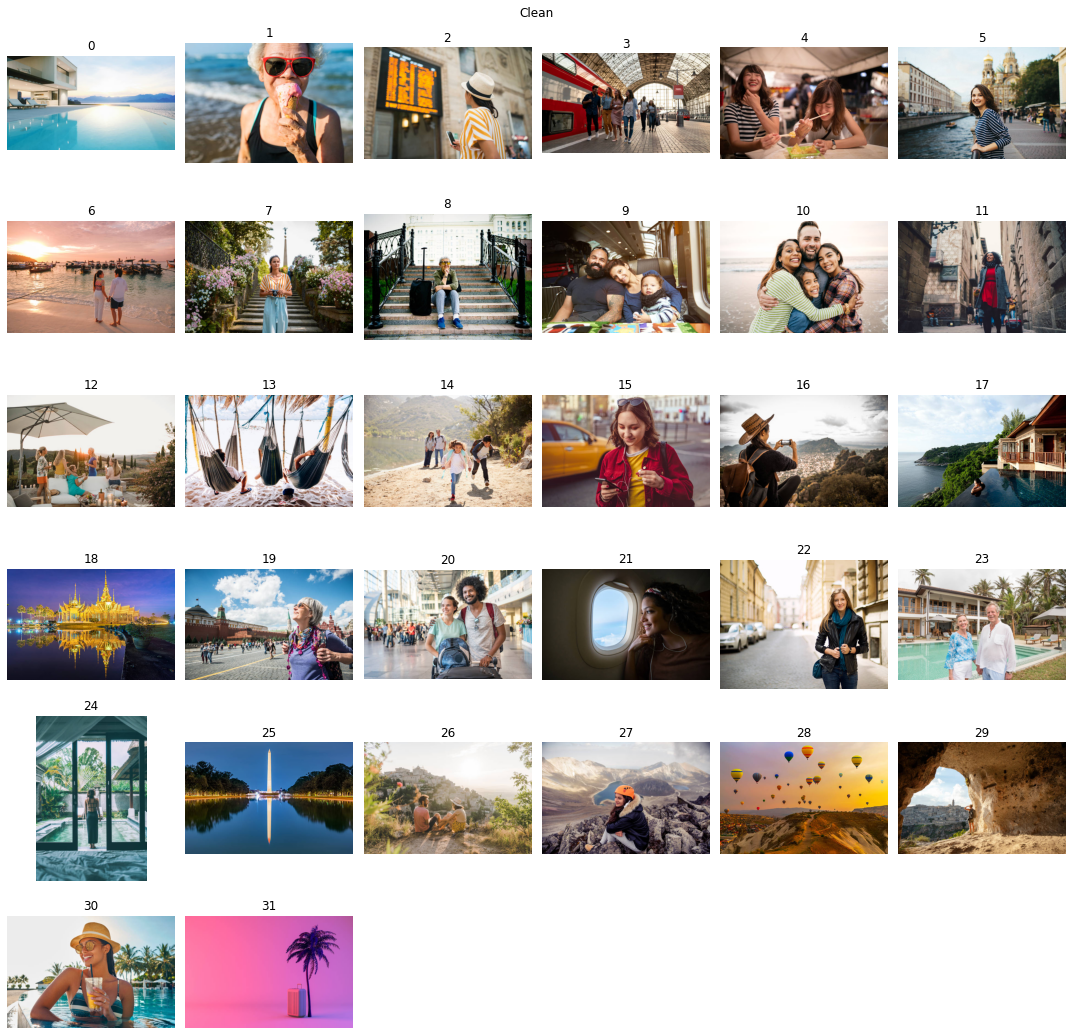

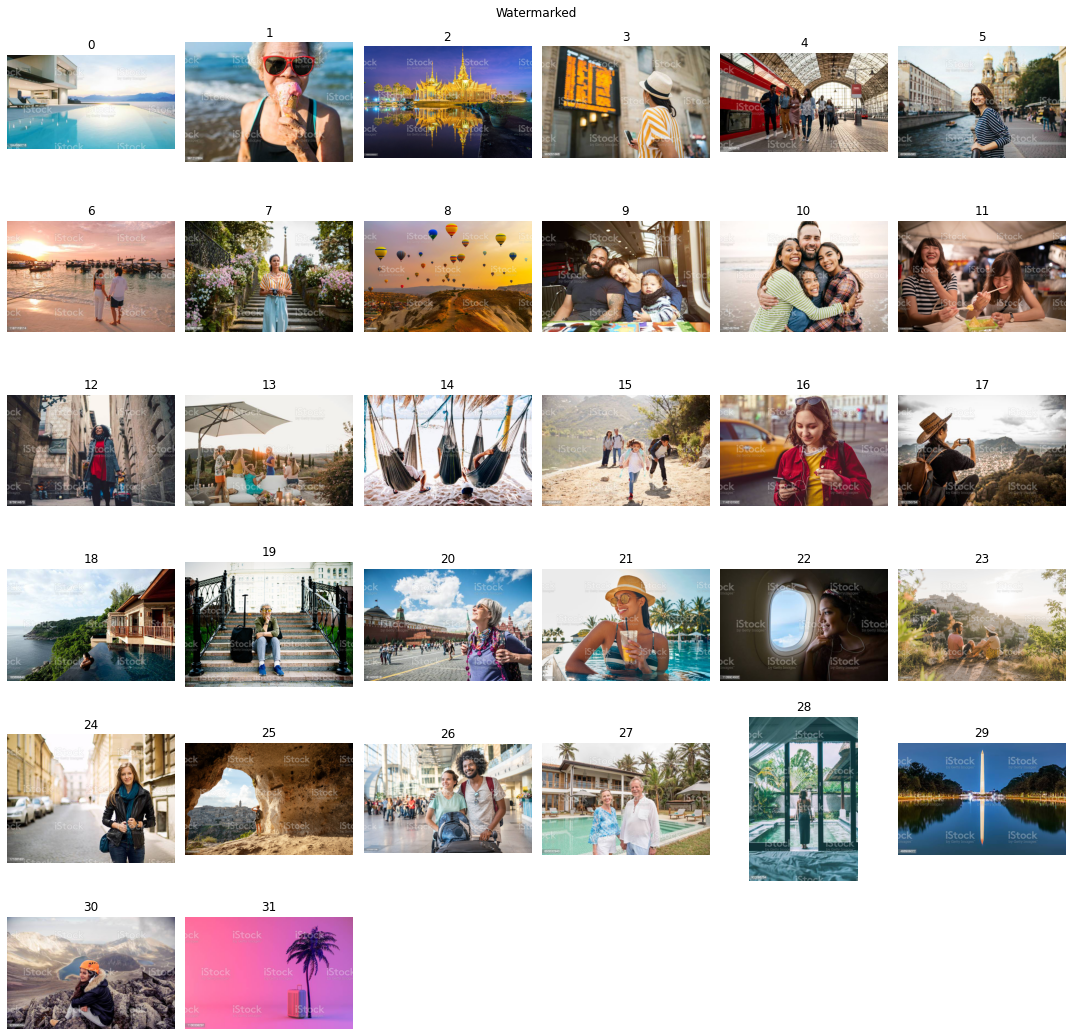

In [4]:
plot_img(clean, title="Clean")
plot_img(marked, title="Watermarked")

In [ ]:
sift = skimage.feature.SIFT()

sift.detect_and_extract(gray(marked[0]))
kps_a, dsc_a = sift.keypoints, sift.descriptors
sift.detect_and_extract(gray(marked[1]))
kps_b, dsc_b = sift.keypoints, sift.descriptors
sift.detect_and_extract(gray(marked[2]))
kps_c, dsc_c = sift.keypoints, sift.descriptors
sift.detect_and_extract(gray(marked[3]))
kps_d, dsc_d = sift.keypoints, sift.descriptors
sift.detect_and_extract(gray(marked[4]))
kps_e, dsc_e = sift.keypoints, sift.descriptors
sift.detect_and_extract(gray(marked[5]))
kps_f, dsc_f = sift.keypoints, sift.descriptors

matches_ab = skimage.feature.match_descriptors(dsc_a, dsc_b)
matches_bc = skimage.feature.match_descriptors(dsc_b, dsc_c)
matches_cd = skimage.feature.match_descriptors(dsc_c, dsc_d)
matches_ef = skimage.feature.match_descriptors(dsc_e, dsc_f)

In [ ]:
matches_abcd = skimage.feature.match_descriptors(dsc_a[matches_ab[..., 0]], dsc_c[matches_cd[..., 0]])
matches_abcdef = skimage.feature.match_descriptors(dsc_c[matches_abcd[..., 1]], dsc_e[matches_ef[..., 0]])

fig = plt.figure(figsize=(20, 10))
fig.add_subplot(2, 2, 1)
plt.title(f"All keypoints", fontsize=20)
plt.imshow(gray(marked[0]), cmap="gray")
plt.scatter(kps_a[..., 1], kps_a[..., 0])
plt.axis("off")

fig.add_subplot(2, 2, 2)
plt.title(f"Matched keypoints of two images", fontsize=20)
plt.imshow(gray(marked[0]), cmap="gray")
plt.scatter(kps_a[matches_ab[..., 0]][..., 1], kps_a[matches_ab[..., 0]][..., 0])
plt.axis("off")

fig.add_subplot(2, 2, 3)
plt.title(f"Matched keypoints of two pairs of images", fontsize=20)
plt.imshow(gray(marked[0]), cmap="gray")
plt.scatter(kps_a[matches_abcd[..., 0]][..., 1], kps_a[matches_abcd[..., 0]][..., 0])
plt.axis("off")

fig.add_subplot(2, 2, 4)
plt.title(f"Matched keypoints of three pairs of images", fontsize=20)
plt.imshow(gray(marked[0]), cmap="gray")
plt.scatter(kps_a[matches_abcdef[..., 0]][..., 1], kps_a[matches_abcdef[..., 0]][..., 0])
plt.axis("off")

plt.tight_layout()

plt.show()